# Relabelling Approach

This note explores the following unobserved confounders model:  
Let $X_t$ and $U_t$ be observed covariates and unobserved confounders respectively. Here $t \in \{1,\dots, 10\}$.  
$X_t \overset{\text{iid}}{\sim} \mathcal{N}(10,1)$.  
$U_1 \sim \mathcal{N}(0,1)$. $U_t \sim \mathcal{N}(U_{t-1},1)$.
Let the reward function be defined as follows:  
$R(X_t,U_t,A_t) = \begin{cases} A_t & A_t + U_t \leq \frac{3}{2}X_t \\ 
-100 & \text{o.w.} 
\end{cases}$

In [254]:
import numpy as np
import matplotlib.pyplot as plt

In [304]:
def generate_confounders():
    u = []
    for i in range(10):
        if i == 0:
            u.append(np.random.normal(0,1))
        else:
            u.append(np.random.normal(u[i-1],1))
    return u

In [305]:
def get_optimal_at(xt,ut):
    return max(1.5*xt - ut, 0)

In [306]:
def reward(xt, ut, at):
    if at + ut <= 1.5*xt:
        return max(at, 0)
    return -100

Here we compare the reward from the optimal policy with real values $U_t$ known, against the optimal policy with real values of $U_t$ unknown. In the latter case, we generate the values of $U'_t$ using the model described above, and take optimal actions w.r.t. $X_t$ and $U'_t$ values.

In [290]:
u_gen = generate_confounders()
u_real = generate_confounders()
x = np.random.normal(10,1,10)
total_real_reward = 0
total_gen_reward = 0
diff = []
for i in range(10):
    total_gen_reward += reward(x[i],u_real[i], get_optimal_at(x[i],u_gen[i]))
    total_real_reward += reward(x[i],u_real[i], get_optimal_at(x[i],u_real[i]))
    total_gen2_reward += reward(x[i],u_real[i], get_optimal_at(x[i],0))
    diff.append(total_real_reward - total_gen_reward)


In [291]:
total_gen_reward

-420.45255971118524

In [292]:
total_real_reward

44.05425078467894

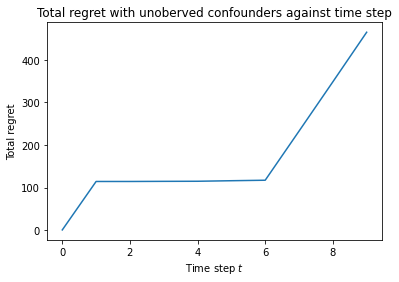

In [293]:
plt.plot(diff)
plt.xlabel('Time step $t$')
plt.ylabel('Total regret')
plt.title('Total regret with unoberved confounders against time step')
plt.show()

## Policy switch half way through the patient treatment
Now let us assume that the observational data contains optimal actions for a patient for $t \leq 5$. Using these actions, we are able to deduce $U_t$ for $t\leq5$ perfectly. The best estimate for $U_t$ for $t>5$ is $U_5$ because of the way $U_i$ are generated.

In [320]:
u_real = generate_confounders()
u_estimated = u_real[:5] + [u_real[4]]*5
x = np.random.normal(10,1,10)
cum_reward_obs_conf = [0]
cum_reward_unobs_conf = [0]
total_real_conf_reward = 0
total_estimated_conf_reward = 0
for i in range(10):
    total_estimated_conf_reward += reward(x[i],u_real[i], get_optimal_at(x[i], u_estimated[i]))
    total_real_conf_reward += reward(x[i],u_real[i], get_optimal_at(x[i],u_real[i]))
    cum_reward_unobs_conf.append(total_estimated_conf_reward)
    cum_reward_obs_conf.append(total_real_conf_reward)


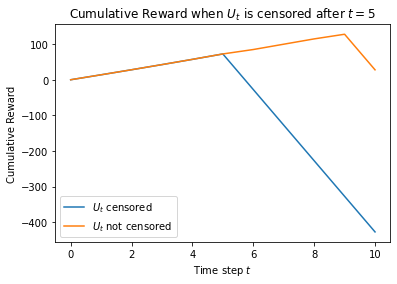

In [321]:
plt.title('Cumulative Reward when $U_t$ is censored after $t=5$')
plt.ylabel('Cumulative Reward')
plt.xlabel('Time step $t$')
plt.plot(cum_reward_unobs_conf)
plt.plot(cum_reward_obs_conf)
plt.legend(['$U_t$ censored', '$U_t$ not censored'])
plt.show()